In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('spaceship-titanic/train.csv')
test = pd.read_csv('spaceship-titanic/test.csv')

In [3]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [13]:
train.tail()

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True

In [4]:
train.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [5]:
train.describe(include='O')

PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         8693       8492      8476     8494         8511   8490   
unique        8693          3         2     6560            3      2   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e  False   
freq             1       4602      5439        8         5915   8291   

                  Name  
count             8493  
unique            8473  
top     Gollux Reedall  
freq                 2

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [27]:
drop_columns = ['PassengerId', 'Name', 'Cabin']

In [10]:
train.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [12]:
train.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [14]:
train['PassengerGroup'] = train['PassengerId'].apply(lambda x:x.split('_')[0])
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported PassengerGroup  
0        False           0001  
1         True           0002  
2        False           0003  
3        False           0003  
4         True           0004

In [15]:
train.PassengerGroup = pd.to_numeric(train['PassengerGroup'])
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  PassengerGroup  
0        False               1  
1         True               2  
2        False               3  
3        False               3  
4         True               4

In [16]:
train['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

Text(0.5, 1.0, 'what is this Transported for')

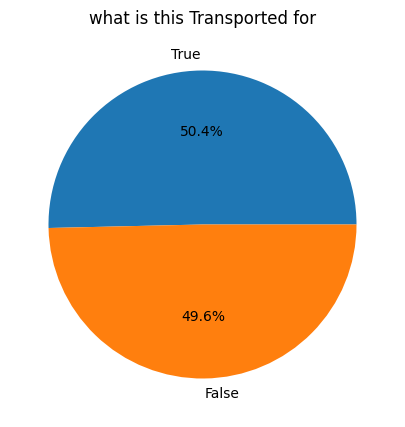

In [ ]:
plt.figure(figsize=(8, 5))
plt.pie(
    x=train['Transported'].value_counts(),
    labels=train['Transported'].value_counts().index,
    autopct='%1.1f%%'
)
plt.title("What is this Transported for")

In [23]:
train['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [24]:
train.Cabin = train.Cabin.fillna('N/-1/N')
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  PassengerGroup  
0        False               1  
1         True               2  
2        False               3  
3        False               3  
4         True               4

In [25]:
test.Cabin = test.Cabin.fillna('N/-1/N')

In [26]:
test['PassengerGroup'] = test['PassengerId'].apply(lambda x:x.split('_')[0])
test.PassengerGroup = pd.to_numeric(test['PassengerGroup'])

In [28]:
train['CabinDeck'] = train['Cabin'].apply(lambda x:x.split('/')[0])
train['CabinNum'] = train['Cabin'].apply(lambda x:x.split('/')[1])
train['CabinSide'] = train['Cabin'].apply(lambda x:x.split('/')[2])

train['CabinNum'] = pd.to_numeric(train['CabinNum'], errors = 'coerce')
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  PassengerGroup CabinDeck  CabinNum CabinSide  
0        False               1         B         0         P  
1         True               2         F         0         S  
2        False               3         A         0         S  
3        False               3         A         0         S  
4         True               4         F         1         S

In [29]:
test['CabinDeck'] = test['Cabin'].apply(lambda x:x.split('/')[0])
test['CabinNum'] = test['Cabin'].apply(lambda x:x.split('/')[1])
test['CabinSide'] = test['Cabin'].apply(lambda x:x.split('/')[2])

test['CabinNum'] = pd.to_numeric(test['CabinNum'], errors = 'coerce')

In [30]:
train.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  PassengerGroup     CabinNum  
count   8505.000000     8693.000000  8693.000000  
mean     304.854791     4633.389624   586.601173  
std     1145.717189     2671.028856   513.906241  
min        0.000000        1.000000    -1.000000  
25%        0.000000     2319.000000   152.000000  
50%        0.000000     4630.000000   407.000000  
75%       46.000000     6883.000000   983.000000  
max    24133.000000     9280.000000  1894.000000

In [31]:
test.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.179072    607.011289   1527.663045    560.821123   1117.186015   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     33.000000     50.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  PassengerGroup     CabinNum  
count   4197.000000     4277.000000  4277.000000  
mean     310.710031     4639.296469   595.888941  
std     1246.994742     2716.197368   517.225073  
min        0.000000       13.000000    -1.000000  
25%        0.000000     2249.000000   162.000000  
50%        0.000000     4639.000000   416.000000  
75%       36.000000     7030.000000  1012.000000  
max    22272.000000     9277.000000  1890.000000

In [32]:
train.describe(include='O')

PassengerId HomePlanet CryoSleep   Cabin  Destination    VIP  \
count         8693       8492      8476    8693         8511   8490   
unique        8693          3         2    6561            3      2   
top        0001_01      Earth     False  N/-1/N  TRAPPIST-1e  False   
freq             1       4602      5439     199         5915   8291   

                  Name CabinDeck CabinSide  
count             8493      8693      8693  
unique            8473         9         3  
top     Gollux Reedall         F         S  
freq                 2      2794      4288

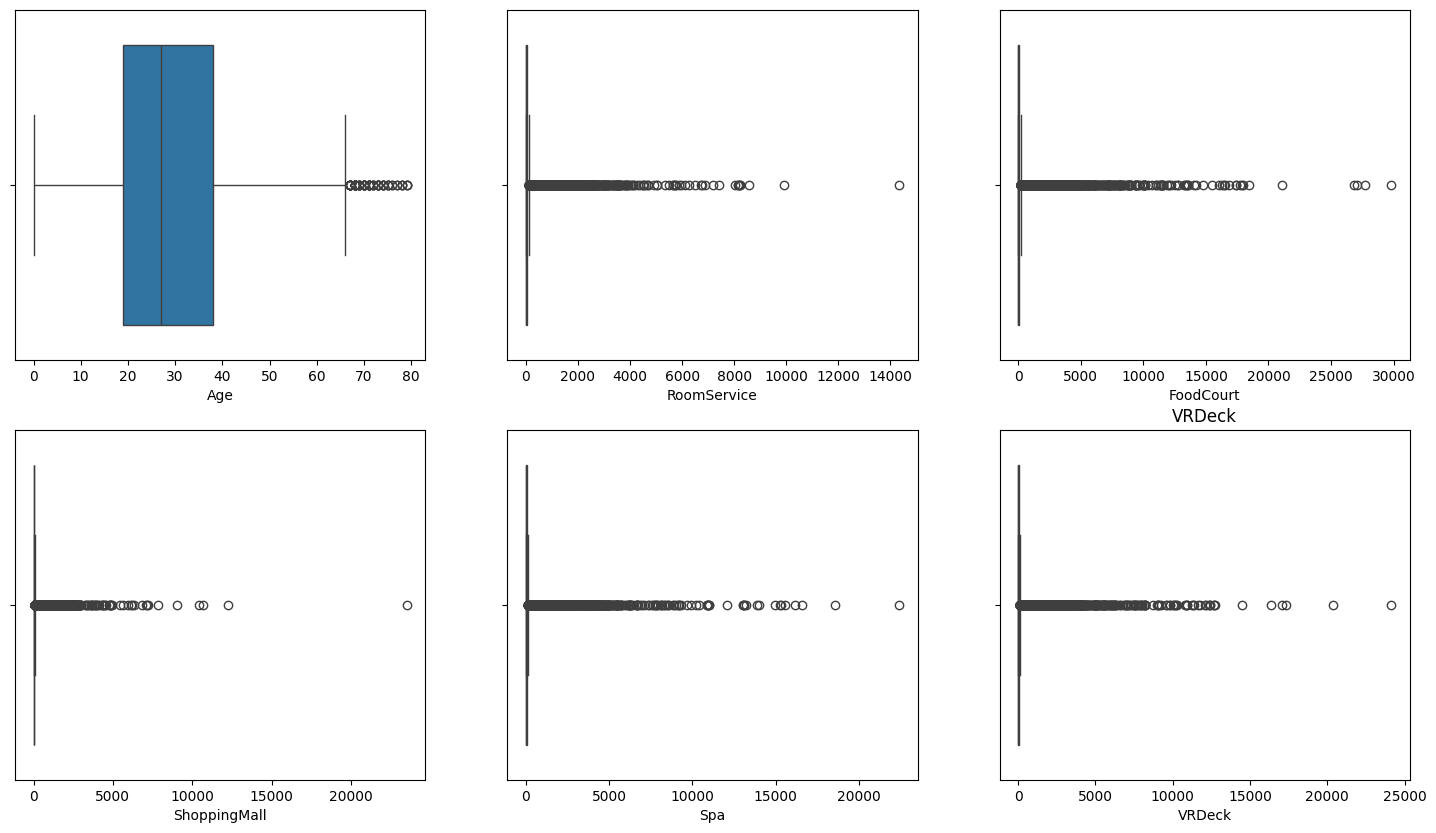

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for i in range(len(numeric_cols)):
    rows = i // 3
    cols = i % 3

    sns.boxplot(x=numeric_cols[i], data=train, ax=axes[rows][cols])
    plt.title(f'{numeric_cols[i]}')

Age 제외 전부 이상치 범벅의 쓰레기데이터

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

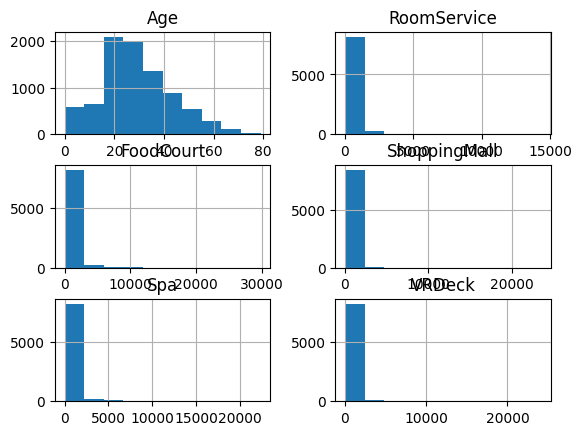

In [40]:
train_numeric = pd.DataFrame(train[numeric_cols])
train_numeric.hist()

In [41]:
for c in numeric_cols:
    train[c] = train[c].fillna(train[c].median())

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   HomePlanet      8492 non-null   object 
 2   CryoSleep       8476 non-null   object 
 3   Cabin           8693 non-null   object 
 4   Destination     8511 non-null   object 
 5   Age             8693 non-null   float64
 6   VIP             8490 non-null   object 
 7   RoomService     8693 non-null   float64
 8   FoodCourt       8693 non-null   float64
 9   ShoppingMall    8693 non-null   float64
 10  Spa             8693 non-null   float64
 11  VRDeck          8693 non-null   float64
 12  Name            8493 non-null   object 
 13  Transported     8693 non-null   bool   
 14  PassengerGroup  8693 non-null   int64  
 15  CabinDeck       8693 non-null   object 
 16  CabinNum        8693 non-null   int64  
 17  CabinSide       8693 non-null   o

In [43]:
for c in numeric_cols:
    test[c] = test[c].fillna(train[c].median())

In [ ]:
train[train['VIP'].isnull()].groupby('CabinDeck').count()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age  VIP  \
CabinDeck                                                                     
A                    6           6          6      6            6    6    0   
B                   12          12         12     12           12   12    0   
C                   19          19         19     19           19   19    0   
D                    9           9          9      9            9    9    0   
E                   15          15         15     15           15   15    0   
F                   70          68         67     70           68   70    0   
G                   66          65         62     66           64   66    0   
N                    6           6          6      6            6    6    0   

           RoomService  FoodCourt  ShoppingMall  Spa  VRDeck  Name  \
CabinDeck                                                            
A                    6          6             6    6       6     6   
B                   12         12            12   12      12    12   
C                   19         19            19   19      19    19   
D                    9          9             9    9       9     9   
E                   15         15            15   15      15    15   
F                   70         70            70   70      70    70   
G                   66         66            66   66      66    65   
N                    6          6             6    6       6     6   

           Transported  PassengerGroup  CabinNum  CabinSide  
CabinDeck                                                    
A                    6               6         6          6  
B                   12              12        12         12  
C                   19              19        19         19  
D                    9               9         9          9  
E                   15              15        15         15  
F                   70              70        70         70  
G                   66              66        66         66  
N                    6               6         6          6

In [46]:
train[~train['VIP'].isnull()].groupby('CabinDeck').count()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age   VIP  \
CabinDeck                                                                       
A                  250         246        244    250          246   250   250   
B                  767         754        748    767          750   767   767   
C                  728         715        705    728          716   728   728   
D                  469         459        459    469          459   469   469   
E                  861         838        841    861          838   861   861   
F                 2724        2656       2659   2724         2659  2724  2724   
G                 2493        2433       2434   2493         2450  2493  2493   
N                  193         187        186    193          189   193   193   
T                    5           4          4      5            5     5     5   

           RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  \
CabinDeck                                                             
A                  250        250           250   250     250   243   
B                  767        767           767   767     767   751   
C                  728        728           728   728     728   714   
D                  469        469           469   469     469   459   
E                  861        861           861   861     861   842   
F                 2724       2724          2724  2724    2724  2651   
G                 2493       2493          2493  2493    2493  2436   
N                  193        193           193   193     193   191   
T                    5          5             5     5       5     4   

           Transported  PassengerGroup  CabinNum  CabinSide  
CabinDeck                                                    
A                  250             250       250        250  
B                  767             767       767        767  
C                  728             728       728        728  
D                  469             469       469        469  
E                  861             861       861        861  
F                 2724            2724      2724       2724  
G                 2493            2493      2493       2493  
N                  193             193       193        193  
T                    5               5         5          5

In [49]:
train.loc[(train['VIP']==True) & (train['CabinDeck']=='N'), 'CabinDeck'] = 'B'
train.loc[(train['VIP']==False) & (train['CabinDeck']=='N'), 'CabinDeck'] = 'F'

In [50]:
train.loc[(train['VIP'].isna()) & (train['CabinDeck']=='N'), 'CabinDeck'] = 'F'
train.loc[(train['CabinDeck']=='B') & (train['CabinNum']==-1), 'CabinNum'] = 166
train.loc[(train['CabinDeck']=='F') & (train['CabinNum']==-1), 'CabinNum'] = 870

In [51]:
train.loc[(train['CabinDeck']=='B') & (train['CabinSide']=='N'), 'CabinSide'] = 'S'
train.loc[(train['CabinDeck']=='F') & (train['CabinSide']=='N'), 'CabinSide'] = 'P'

In [52]:
train['CryoSleep'] = train['CryoSleep'].fillna(0)
train['VIP'] = train['VIP'].fillna(0)
train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['Destination'] = train['Destination'].fillna(train['Destination'].mode()[0])

In [53]:
train.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin               0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              200
Transported         0
PassengerGroup      0
CabinDeck           0
CabinNum            0
CabinSide           0
dtype: int64

In [54]:
test.isna().sum()

PassengerId        0
HomePlanet        87
CryoSleep         93
Cabin              0
Destination       92
Age                0
VIP               93
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name              94
PassengerGroup     0
CabinDeck          0
CabinNum           0
CabinSide          0
dtype: int64

In [55]:
test.loc[(test['VIP']==True) & (test['CabinDeck']=='N'), 'CabinDeck'] = 'B'
test.loc[(test['VIP']==False) & (test['CabinDeck']=='N'), 'CabinDeck'] = 'F'
test
test.loc[(test['VIP'].isna()) & (test['CabinDeck']=='N'), 'CabinDeck'] = 'F'
test.loc[(test['CabinDeck']=='B') & (test['CabinNum']==-1), 'CabinNum'] = 166
test.loc[(test['CabinDeck']=='F') & (test['CabinNum']==-1), 'CabinNum'] = 870
test
test.loc[(test['CabinDeck']=='B') & (test['CabinSide']=='N'), 'CabinSide'] = 'S'
test.loc[(test['CabinDeck']=='F') & (test['CabinSide']=='N'), 'CabinSide'] = 'P'
test
test['CryoSleep'] = test['CryoSleep'].fillna(0)
test['VIP'] = test['VIP'].fillna(0)
test['HomePlanet'] = test['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
test['Destination'] = test['Destination'].fillna(train['Destination'].mode()[0])

test.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name              94
PassengerGroup     0
CabinDeck          0
CabinNum           0
CabinSide          0
dtype: int64

In [ ]:
train[['VIP', 'Transported']].groupby('VIP', as_index=False).mean().sort_values(by='Transported')

VIP  Transported
1   True     0.381910
0  False     0.506475

In [60]:
arrived = train[train['VIP']==True]['Transported'].value_counts()
not_arrived = train[train['VIP']==False]['Transported'].value_counts()

In [61]:
arrived

Transported
False    123
True      76
Name: count, dtype: int64

In [62]:
not_arrived

Transported
True     4302
False    4192
Name: count, dtype: int64

<Axes: >

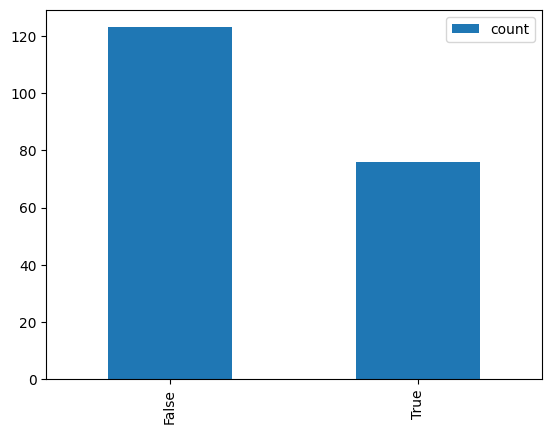

In [80]:
arrived_df = pd.DataFrame(arrived)

arrived_df.index = ['False', 'True']
arrived_df.plot(kind='bar')

<Axes: >

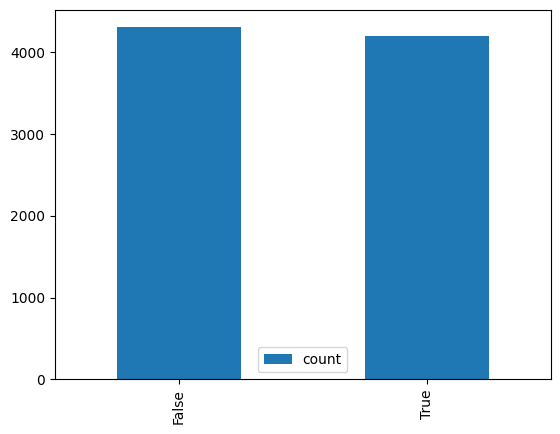

In [81]:
not_arrived_df = pd.DataFrame(not_arrived)

not_arrived_df.index = ['False', 'True']
not_arrived_df.plot(kind='bar')

<Axes: xlabel='Transported', ylabel='count'>

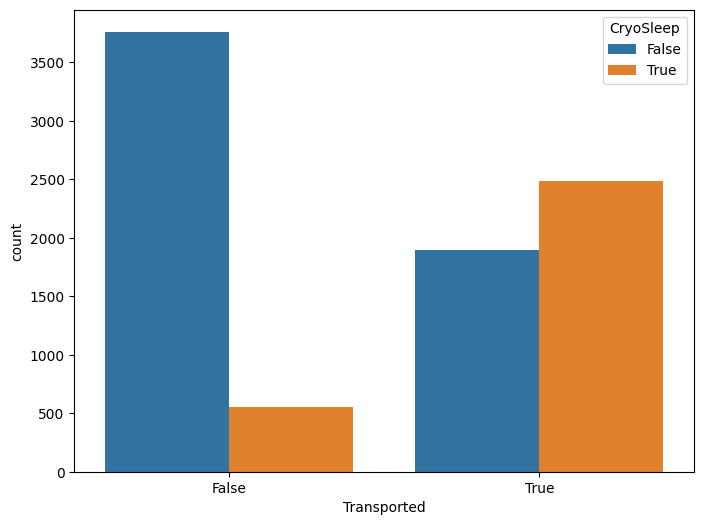

In [82]:
fig = plt.figure(figsize=(8, 6))

sns.countplot(x='Transported', hue='CryoSleep', data=train)

In [83]:
train[['Transported', 'CryoSleep']].groupby('CryoSleep').mean()

Transported
CryoSleep             
False         0.335042
True          0.817583

<Axes: xlabel='HomePlanet', ylabel='count'>

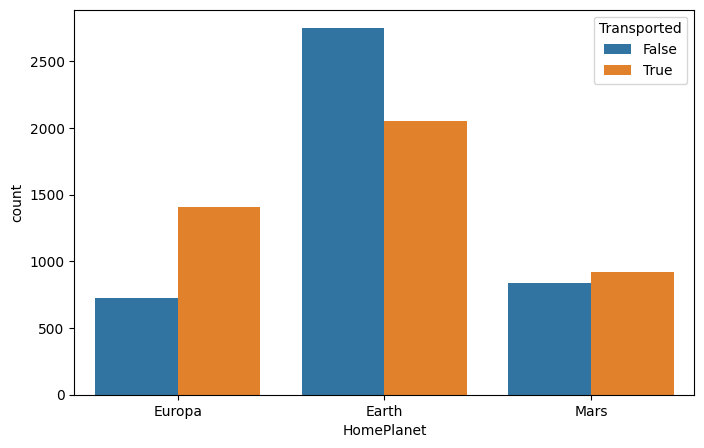

In [84]:
fig = plt.figure(figsize=(8, 5))

sns.countplot(x='HomePlanet', hue='Transported', data=train)

In [87]:
train[['HomePlanet', 'Transported']].groupby('HomePlanet').mean()

Transported
HomePlanet             
Earth          0.427649
Europa         0.658846
Mars           0.523024

In [88]:
train[['Destination', 'Transported']].groupby('Destination').mean()

Transported
Destination               
55 Cancri e       0.610000
PSO J318.5-22     0.503769
TRAPPIST-1e       0.472199

<Axes: xlabel='Destination', ylabel='count'>

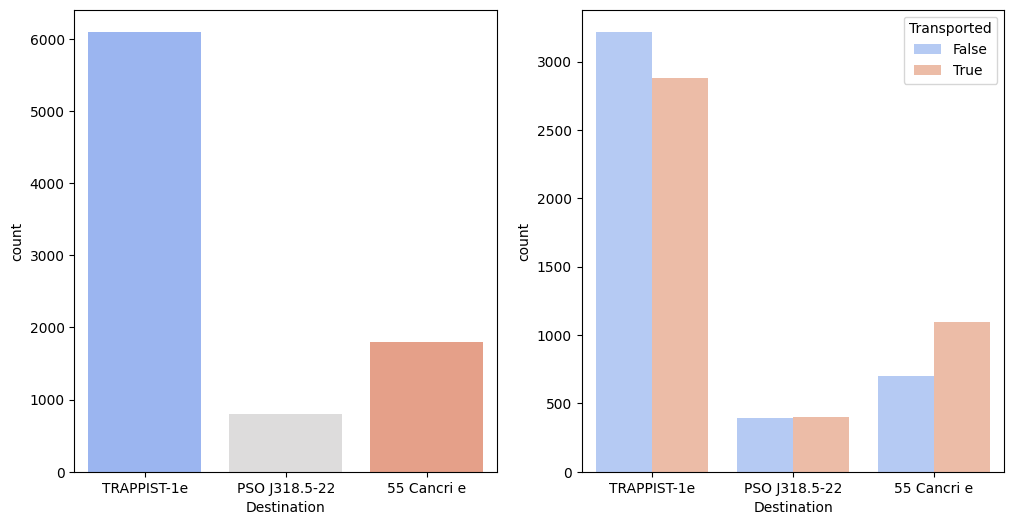

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='Destination', data=train, ax=axes[0], palette='coolwarm')
sns.countplot(x='Destination', hue='Transported', data=train, ax=axes[1], palette='coolwarm')

<Axes: xlabel='Age', ylabel='Density'>

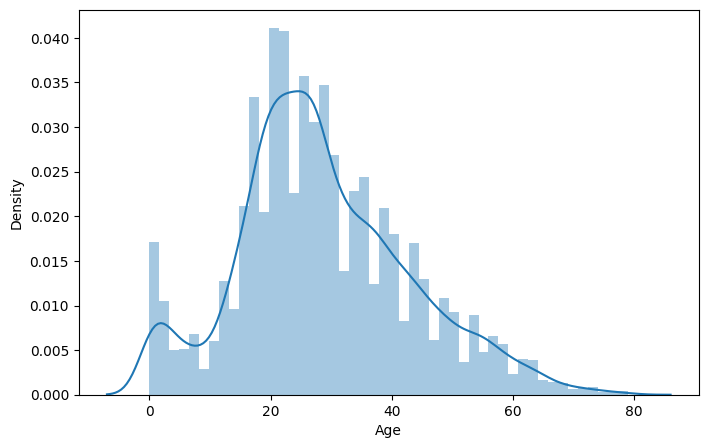

In [92]:
fig = plt.figure(figsize=(8, 5))
sns.distplot(train['Age'])

<Axes: xlabel='Age', ylabel='Density'>

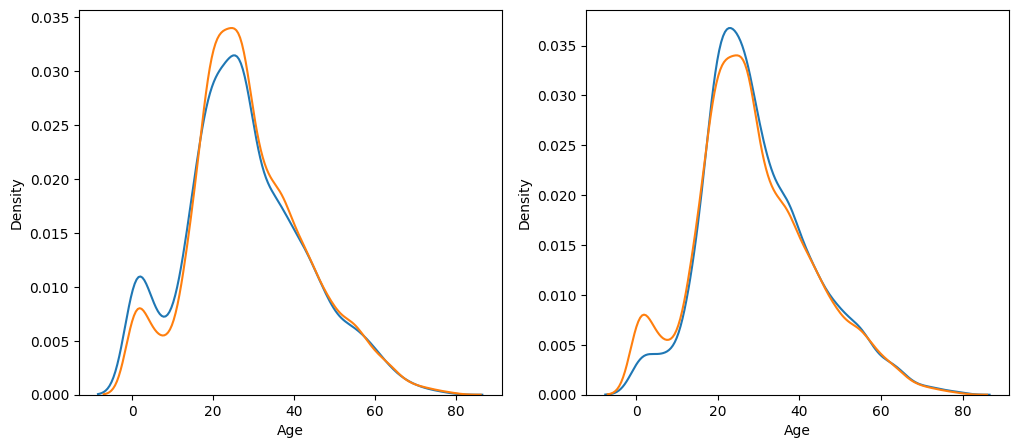

In [ ]:
arrived = train[train['Transported']==True]
not_arrived = train[train['Transported']==False]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(arrived['Age'], ax=axes[0])
sns.kdeplot(train['Age'], ax=axes[0])

sns.kdeplot(not_arrived['Age'], ax=axes[1])
sns.kdeplot(train['Age'], ax=axes[1])

In [95]:
categorizational_col = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']

for col in categorizational_col:
    cats = train[col].astype('category').cat.categories
    train[col] = pd.Categorical(train[col], categories=cats).codes
    test[col] = pd.Categorical(test[col], categories=cats).codes

In [96]:
train = train.drop(columns=drop_columns)
test = test.drop(columns=drop_columns)

In [97]:
numeric_cols

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [99]:
for col in numeric_cols[1:]:
    train[col] = train[col].apply(lambda x:np.log1p(x))
    test[col] = test[col].apply(lambda x:np.log1p(x))

In [100]:
train.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0           1          0            2  39.0    0     0.000000   0.000000   
1           0          0            2  24.0    0     4.700480   2.302585   
2           1          0            2  58.0    1     3.784190   8.182280   
3           1          0            2  33.0    0     0.000000   7.157735   
4           0          0            2  16.0    0     5.717028   4.262680   

   ShoppingMall       Spa    VRDeck  Transported  PassengerGroup  CabinDeck  \
0      0.000000  0.000000  0.000000        False               1          1   
1      3.258097  6.309918  3.806662         True               2          5   
2      0.000000  8.812248  3.912023        False               3          0   
3      5.918894  8.110728  5.267858        False               3          0   
4      5.023881  6.338594  1.098612         True               4          5   

   CabinNum  CabinSide  
0         0          0  
1         0          1  
2         0          1  
3         0          1  
4         1          1

In [108]:
y_train = train['Transported']
y_train

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [109]:
y_train = y_train.astype('category').cat.codes

In [111]:
X_train = train.drop(columns='Transported')
X_train.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0           1          0            2  39.0    0     0.000000   0.000000   
1           0          0            2  24.0    0     4.700480   2.302585   
2           1          0            2  58.0    1     3.784190   8.182280   
3           1          0            2  33.0    0     0.000000   7.157735   
4           0          0            2  16.0    0     5.717028   4.262680   

   ShoppingMall       Spa    VRDeck  PassengerGroup  CabinDeck  CabinNum  \
0      0.000000  0.000000  0.000000               1          1         0   
1      3.258097  6.309918  3.806662               2          5         0   
2      0.000000  8.812248  3.912023               3          0         0   
3      5.918894  8.110728  5.267858               3          0         0   
4      5.023881  6.338594  1.098612               4          5         1   

   CabinSide  
0          0  
1          1  
2          1  
3          1  
4          1

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'XGB':XGBClassifier(),
    'LGB':LGBMClassifier()
}

In [112]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
2333           0          0            2  28.0    0     0.000000   4.025352   
2589           0          0            2  17.0    0     0.000000   7.086738   
8302           1          1            0  28.0    0     0.000000   0.000000   
8177           2          0            2  20.0    0     0.000000   1.098612   
500            1          1            0  36.0    0     0.000000   0.000000   
...          ...        ...          ...   ...  ...          ...        ...   
5734           0          0            2  18.0    0     2.708050   1.098612   
5191           2          0            2  50.0    0     6.538140   0.000000   
5390           0          0            1  22.0    0     5.068904   0.000000   
860            2          0            2  34.0    0     5.940171   0.000000   
7270           1          0            0  28.0    0     2.079442   6.194405   

      ShoppingMall       Spa    VRDeck  PassengerGroup  CabinDeck  CabinNum  \
2333      0.000000  6.487684  0.000000            2513          5       870   
2589      3.465736  0.000000  0.000000            2774          5       575   
8302      0.000000  0.000000  0.000000            8862          2       329   
8177      5.669881  6.884487  0.000000            8736          5      1800   
500       0.000000  0.000000  0.000000             539          2        18   
...            ...       ...       ...             ...        ...       ...   
5734      4.976734  6.415097  0.000000            6076          6       988   
5191      3.433987  6.637258  6.061457            5537          5      1063   
5390      6.167516  0.000000  3.295837            5756          5      1194   
860       7.394493  0.000000  0.000000             925          5       191   
7270      0.000000  1.609438  8.704171            7775          2       253   

      CabinSide  
2333          0  
2589          0  
8302          1  
8177          0  
500           0  
...         ...  
5734          1  
5191          1  
5390          0  
860           0  
7270          0  

[6954 rows x 14 columns]

In [113]:
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    acc = accuracy_score(y_train, pred)
    f1score = f1_score(y_train, pred)
    print(f'{name} : {acc}, {f1score}')


Logistic Regression : 0.7727926373310325, 0.7803114571746385
Random Forest : 0.999712395743457, 0.9997143673236218
XGB : 0.9355766465343687, 0.9364899347887723
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1883
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
LGB : 0.8927236123094622, 0.8946327683615819


In [115]:
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, pred)
    f1score = f1_score(y_valid, pred)
    print(f'{name} : {acc}, {f1score}')


Logistic Regression : 0.7602070155261644, 0.7702479338842976
Random Forest : 0.7952846463484762, 0.7939814814814815
XGB : 0.7889591719378953, 0.7913587265491757
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1883
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
LGB : 0.8073605520414031, 0.8112676056338028


In [116]:
from sklearn.model_selection import GridSearchCV

model = LGBMClassifier(random_state=42)

In [117]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [15, 31, 63],
    'min_child_samples': [10, 20],
}

In [ ]:
grid = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score :", grid.best_score_)

In [118]:
grid = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best Params: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Info] Number of positive: 2800, number of negative: 2763
[LightGBM] [Info] Number of positive: 2800, number of negative: 2763
[LightGBM] [Info] Number of positive: 2800, number of negative: 2763
[LightGBM] [Info] Number of positive: 2800, number of negative: 2764
[LightGBM] [Info] Number of positive: 2800, number of negative: 2763
[LightGBM] [Info] Number of positive: 2800, number of negative: 2763
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1882
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overh

In [119]:
lightgbm = LGBMClassifier(learning_rate=0.1, max_depth=7, min_child_samples=20, n_estimators=100, num_leaves=15)
lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1883
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230


LGBMClassifier(max_depth=7, num_leaves=15)

In [120]:
pred = lightgbm.predict(test)

In [121]:
result_map = { 0:False, 1:True}
passenger = pd.read_csv('spaceship-titanic/test.csv')

submission = pd.DataFrame({
    'PassengerId': passenger['PassengerId'],
    'Transported': pred
})

In [122]:
submission['Transported'] = submission['Transported'].map(result_map)

In [123]:
submission.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

In [124]:
submission.to_csv('result.csv', index=False)